In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
df = pd.read_csv('stroke-data.csv')

In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
#univariate

In [22]:
df = df.drop(columns = ['id'])

In [23]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [27]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='gender'>

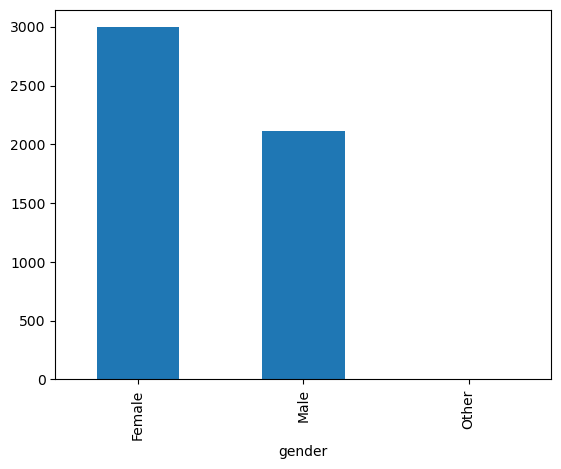

In [29]:
# Female    2994
# Male      2115
df['gender'].value_counts().plot(kind = 'bar')

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [31]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\4209630136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

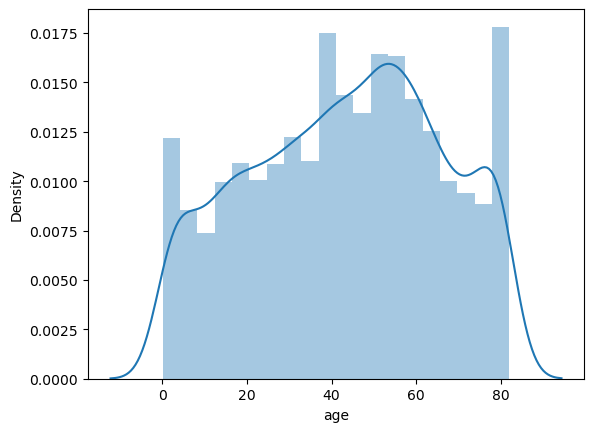

In [32]:
# the bellow graph is not a gaussian distribution, points spread across the graph
sns.distplot(df['age'])

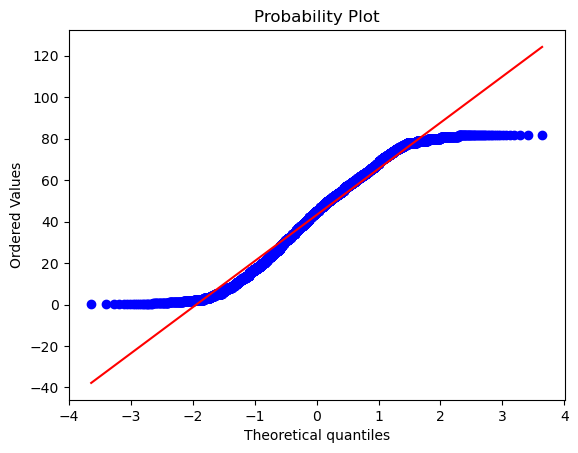

In [33]:
stats.probplot(df['age'], dist = 'norm', plot = plt)
plt.show()

In [34]:
stats.skew(df['age'])

np.float64(-0.1370190866396024)

In [35]:
stats.kurtosis(df['age'])

np.float64(-0.9912147700517671)

<Axes: ylabel='age'>

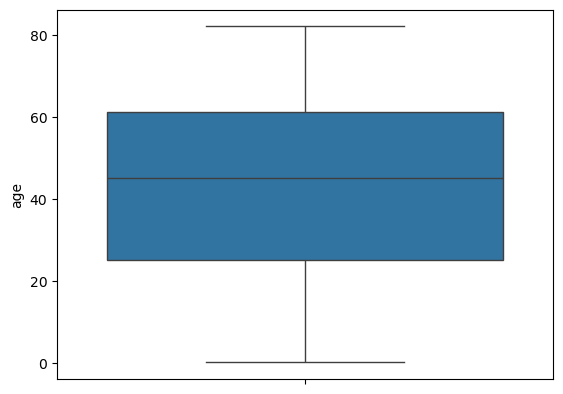

In [36]:
# There is no outliers present in the column
sns.boxplot(df['age'])

In [37]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
df['hypertension'].unique()

array([0, 1])

In [39]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: ylabel='hypertension'>

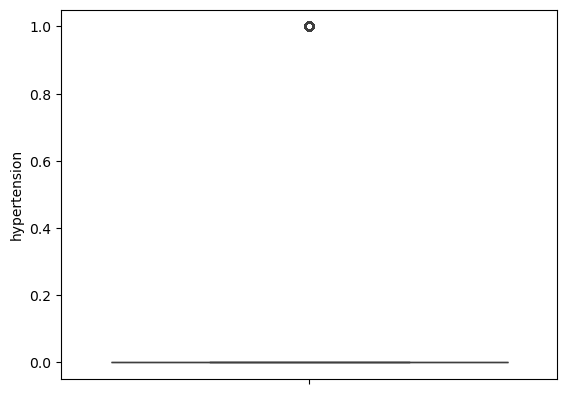

In [40]:
sns.boxplot(df['hypertension'])

<Axes: xlabel='hypertension'>

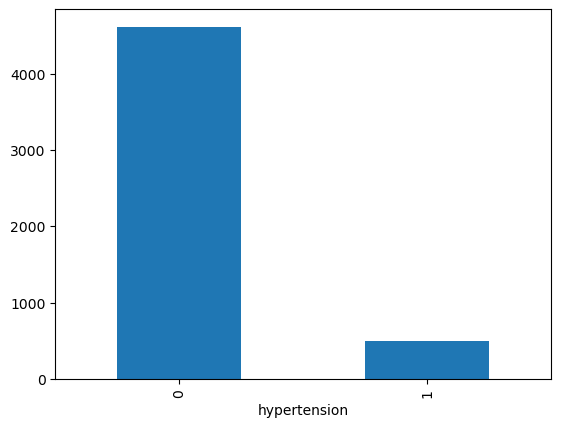

In [41]:
# Hypertension:
# 1 : 400
# 0 : 4850
df['hypertension'].value_counts().plot(kind = 'bar')

In [42]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
df['heart_disease'].unique()

array([1, 0])

In [44]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [45]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='heart_disease'>

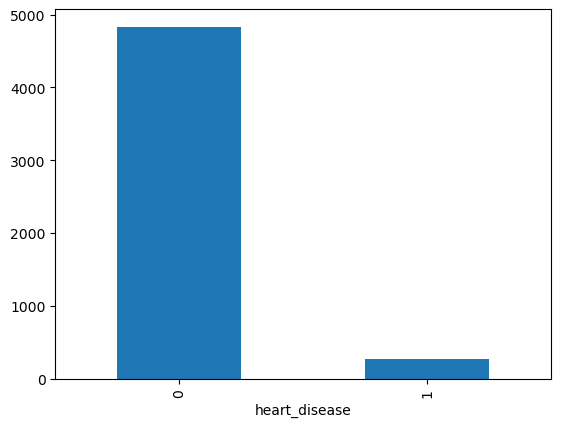

In [46]:
#heartdisease
# 1 : 200
# 2 : 4800
df['heart_disease'].value_counts().plot(kind = 'bar')

In [47]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [48]:
df['ever_married']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object

In [49]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: xlabel='ever_married'>

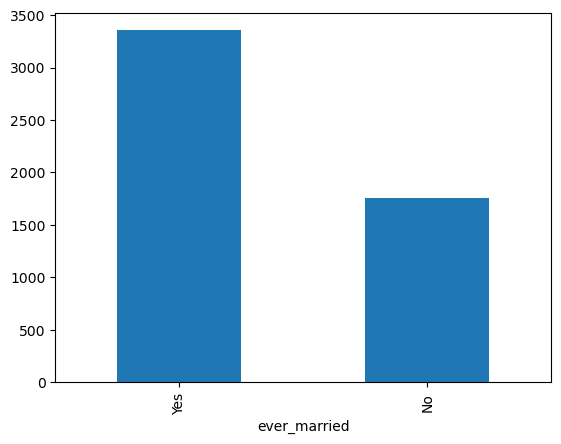

In [51]:
# ever_married
# Yes    3353
# No     1757
df['ever_married'].value_counts().plot(kind = 'bar')

In [52]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
df['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [54]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [55]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: xlabel='work_type'>

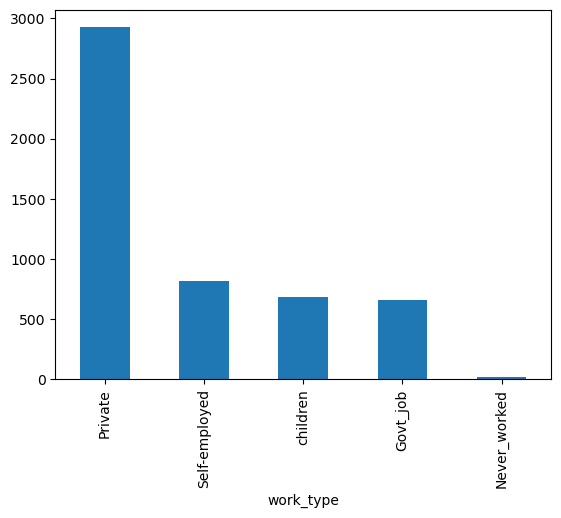

In [56]:
#work_type
#Private          2925
#Self-employed     819
#children          687
#Govt_job          657
#Never_worked       22

df['work_type'].value_counts().plot(kind = 'bar')

In [57]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [58]:
df['Residence_type']

0       Urban
1       Rural
2       Rural
3       Urban
4       Rural
        ...  
5105    Urban
5106    Urban
5107    Rural
5108    Rural
5109    Urban
Name: Residence_type, Length: 5110, dtype: object

In [59]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [60]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

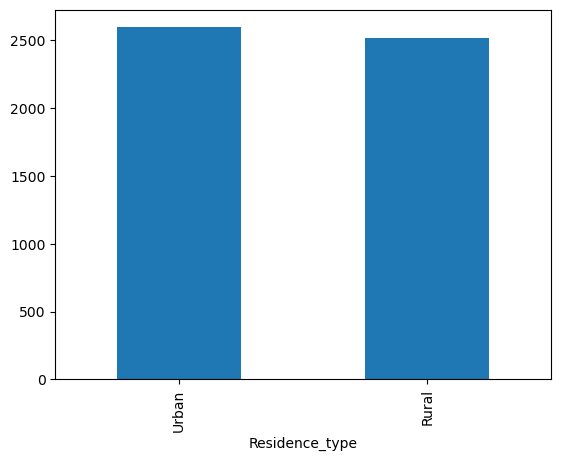

In [61]:
# both urban & Rural are same and equal
# Residence_type
# Urban    2596
# Rural    2514

df['Residence_type'].value_counts().plot(kind = 'bar')

In [62]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\1245809129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'])


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

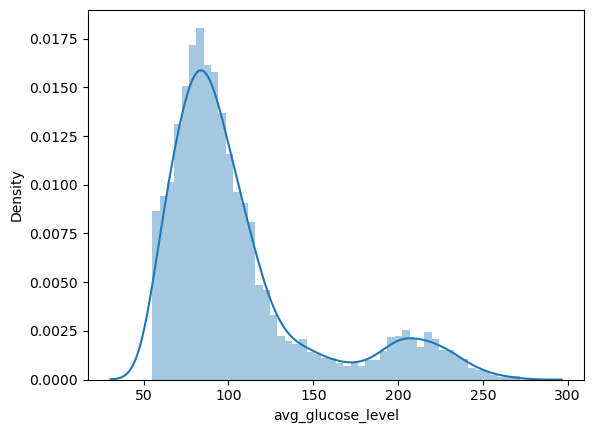

In [64]:
# the below distribution not looking like a gaussian distribution
sns.distplot(df['avg_glucose_level']) 

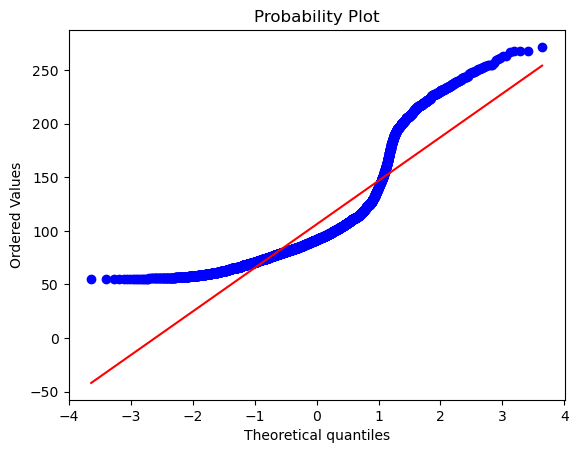

In [65]:
stats.probplot(df['avg_glucose_level'], dist = 'norm', plot = plt)
plt.show()

<Axes: ylabel='avg_glucose_level'>

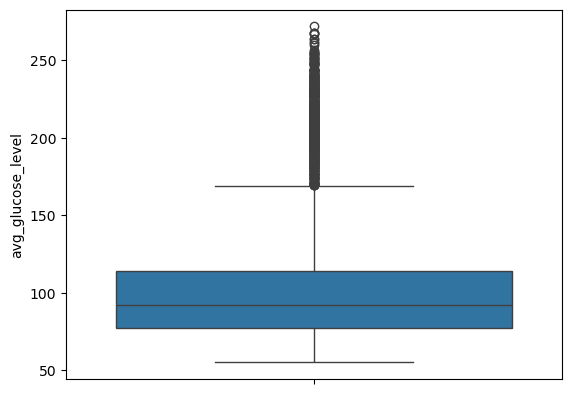

In [66]:
# there is a lots of outliers present in this column
sns.boxplot(df['avg_glucose_level'])

In [67]:
#chebyshev's & equality
mu = df['avg_glucose_level'].mean()
sigma = df['avg_glucose_level'].std() 

In [68]:
min_2 = 1 - (1 / 2 ** 2)
min_3 = 1 - (1 / 3 ** 2)     

In [69]:
lower_2 = mu - 2 * sigma
upper_2 = mu + 2 * sigma 

In [70]:
lower_3 = mu - 3 * sigma
upper_3 = mu + 3 * sigma

In [71]:
mu

np.float64(106.1476771037182)

In [72]:
sigma 

45.28356015058203

In [73]:
min_2

0.75

In [74]:
min_3

0.8888888888888888

In [75]:
lower_2

np.float64(15.580556802554128)

In [76]:
lower_3

np.float64(-29.70300334802789)

In [77]:
upper_2

np.float64(196.71479740488226)

In [78]:
upper_3

np.float64(241.99835755546428)

In [79]:
actual_prop_2 = (
    (df['avg_glucose_level'] >= lower_2) &
    (df['avg_glucose_level'] <= upper_2)
).mean()

In [80]:
actual_prop_2

np.float64(0.9080234833659491)

In [81]:
actual_prop_3 = (
    (df['avg_glucose_level'] >= lower_3) &
    (df['avg_glucose_level'] <= upper_3)
).mean()

In [82]:
actual_prop_3

np.float64(0.9904109589041096)

In [83]:
# from the above observation the column is still not gaussian 
#90% of observation is lies in second range of SD
#99.04% data is lies between 3rd range of SD

In [84]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [85]:
df['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [86]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [87]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

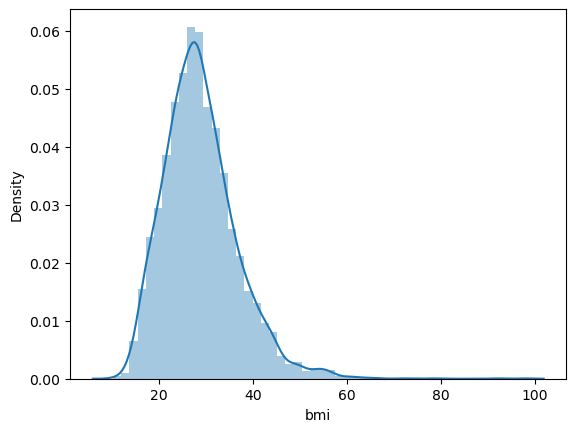

In [88]:
sns.distplot(df['bmi'])

In [89]:
plt.savefig('bmi.png')
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='bmi'>

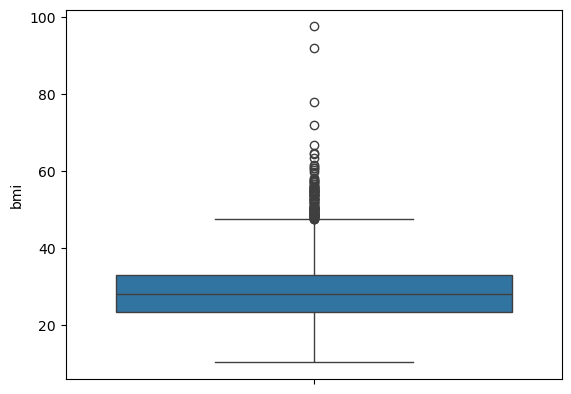

In [90]:
# there is a lots of outliers present in this column
sns.boxplot(df['bmi'])

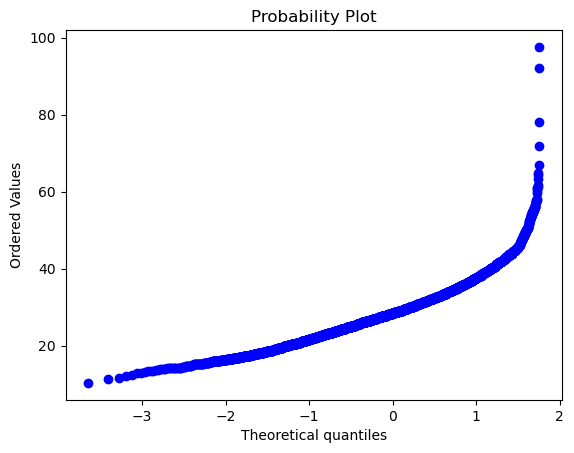

In [91]:
stats.probplot(df['bmi'], dist = 'norm', plot = plt)
plt.show()

In [92]:
log = np.log(df['bmi'])

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\1025391869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log)


<Axes: xlabel='bmi', ylabel='Density'>

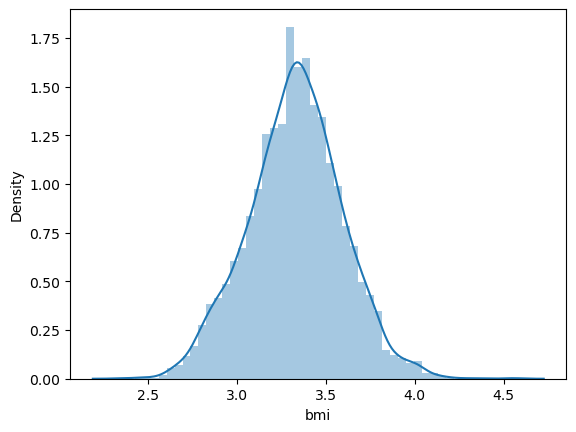

In [93]:
# BMI column is now looking like a gaussian because we did the log transformation on that column 
# all the data points are symmetric towards the mean and lies towards the mean
sns.distplot(log)

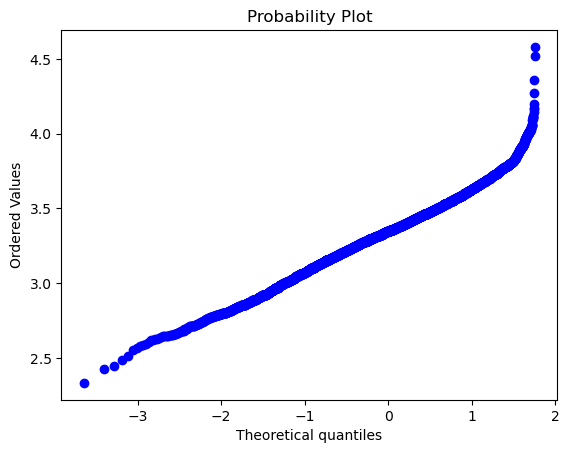

In [94]:
stats.probplot(log, dist = 'norm', plot = plt)
plt.show()

In [95]:
df['bmi'] = df['bmi'].fillna(np.mean(df['bmi']))

In [96]:
#CDF
#CDF2
def cum_sum(data):
    lst1 = np.sort(data)
    ew_lst = []
    for i in lst1:
        if i not in ew_lst:
            ew_lst += [i]
    new_lst = []
    count = 0
    for j in ew_lst:
        for k in data:
            if j == k:
                count += 1
        new_lst += [count]
    new1 = []
    for i in new_lst:
        cum_prob = i / len(data)
        new1 += [cum_prob]
    return ew_lst, new1
    
    
data = df['bmi']
x, y = cum_sum(data)

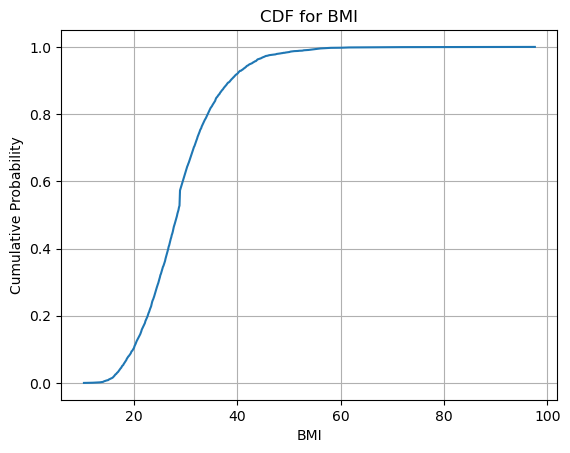

In [97]:
#10% people have the <= 20 BMI 
#92% people have the <= 40 BMI 
#remaining 8% people whose BMI > 60

plt.title('CDF for BMI')
plt.xlabel('BMI')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.plot(x, y)
plt.savefig("cdf.png")
plt.show()

In [98]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [99]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [100]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: xlabel='smoking_status'>

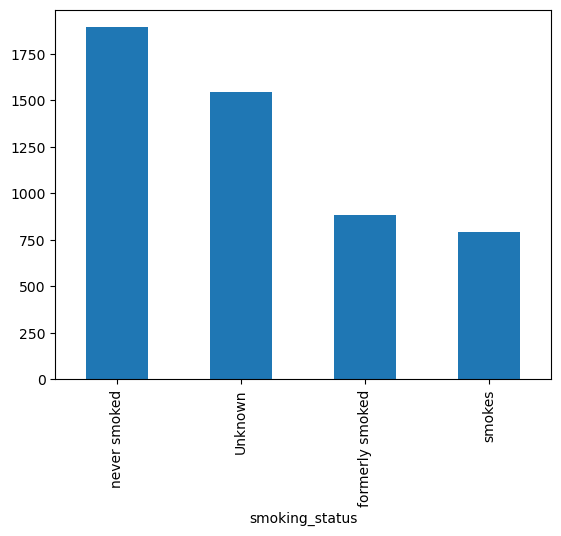

In [101]:
df['smoking_status'].value_counts().plot(kind = 'bar')

In [102]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [103]:
df['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [104]:
df['stroke'].unique()

array([1, 0])

In [105]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

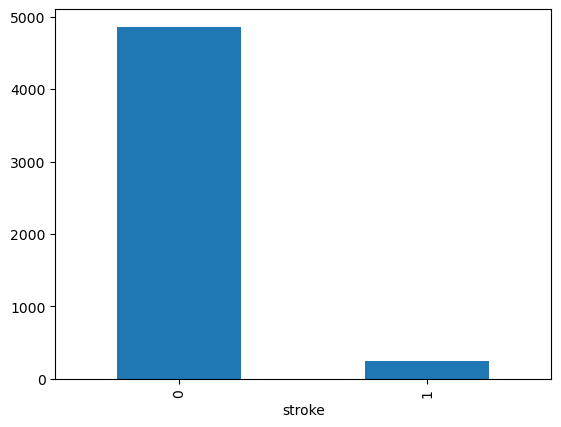

In [106]:
df['stroke'].value_counts().plot(kind = 'bar')

In [107]:
male  = df['gender'][(df['gender'] == 'Male') & (df['stroke'] == 1)].shape[0]

In [108]:
male

108

In [109]:
female  = df['gender'][(df['gender'] == 'Female') & (df['stroke'] == 1)].shape[0]

In [110]:
female

141

In [111]:
#bivariate

In [112]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

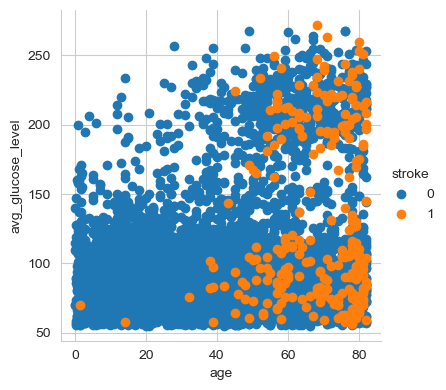

In [113]:
#if the age is >= 30 and and Glucose level is upto 135 then there will be no stroke
#if your age is greater than 32 and glucode level is upto 125 then there will be the high possibilities you can get a stroke
#if the age is increasing then defietly glucose level is also increasing and high possibility they can get a stroke
#after the 40 then there is a high chance of getting stroke
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'stroke', height = 4).map(plt.scatter, 'age', 'avg_glucose_level').add_legend()
plt.show()

In [114]:
stats.spearmanr(df['age'], df['avg_glucose_level'])

SignificanceResult(statistic=np.float64(0.1451677092953779), pvalue=np.float64(1.8096446852948583e-25))

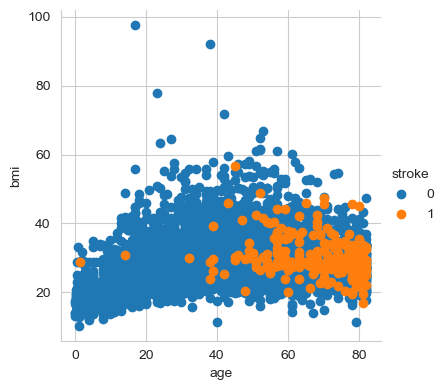

In [115]:
# age increases we have a higher BMI
#if age is <= 35 then there is no stroke
#there is no BMI if age is < 4
#people whose age is < 40 then they have a high BMI
#if age > 40 and 20 > BMI < 40 then i chance to get stroke
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'stroke', height = 4).map(plt.scatter, 'age', 'bmi').add_legend()
plt.show()

In [116]:
stats.spearmanr(df['age'], df['bmi'])

SignificanceResult(statistic=np.float64(0.363661456705788), pvalue=np.float64(1.4023181328908246e-159))

In [117]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [118]:
df['bmi'][(df['gender'] == 'Male')].mean()

np.float64(28.65999841079274)

In [119]:
df['bmi'][(df['gender'] == 'Female')].mean()

np.float64(29.060168330141646)

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\1013138178.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means)


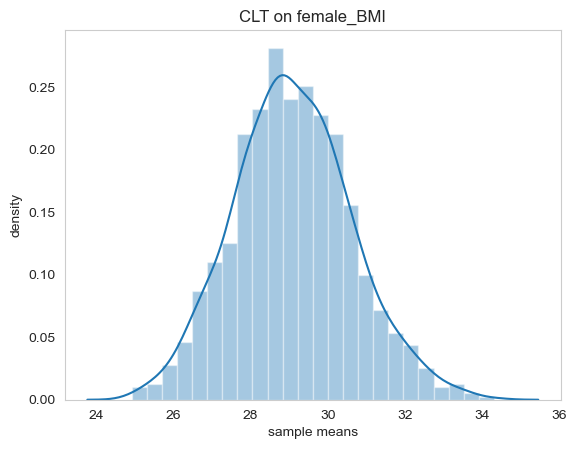

In [120]:
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data = df['bmi'][(df['gender'] == 'Female')]
apply_clt(data, size_of_sample, no_of_samples)
sns.distplot(sample_means)
plt.xlabel('sample means')
plt.ylabel('density')
plt.title('CLT on female_BMI')
plt.grid()
plt.show()

C:\Users\khair\AppData\Local\Temp\ipykernel_10820\3491463414.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means)


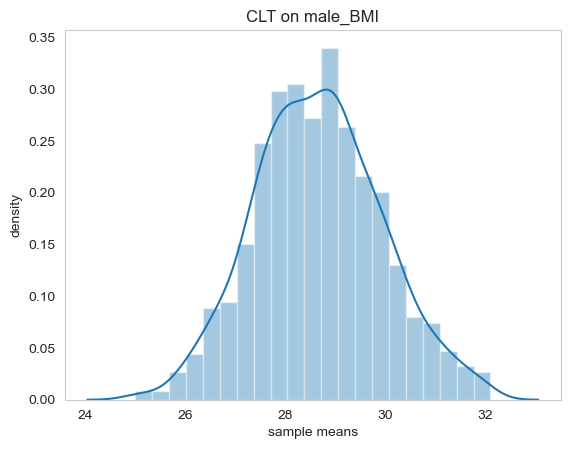

In [121]:
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data = df['bmi'][(df['gender'] == 'Male')]
apply_clt(data, size_of_sample, no_of_samples)
sns.distplot(sample_means)
plt.xlabel('sample means')
plt.ylabel('density')
plt.title('CLT on male_BMI')
plt.grid()
plt.show()

In [130]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [132]:
stats.spearmanr(df['age'], df['heart_disease'])

SignificanceResult(statistic=np.float64(0.26962727093389066), pvalue=np.float64(7.904110332957262e-86))

In [133]:
stats.spearmanr(df['age'], df['hypertension'])

SignificanceResult(statistic=np.float64(0.28064743429853867), pvalue=np.float64(4.010053113295675e-93))

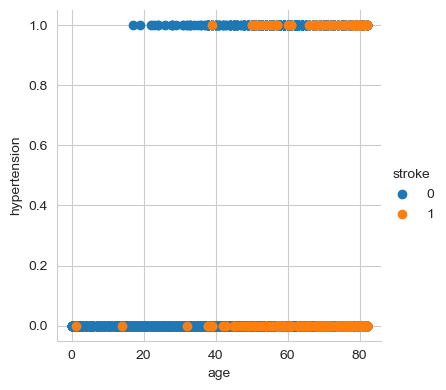

In [134]:
#there is know relation between age and hyperstension
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'stroke', height = 4).map(plt.scatter, 'age', 'hypertension').add_legend()
plt.show()

In [135]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

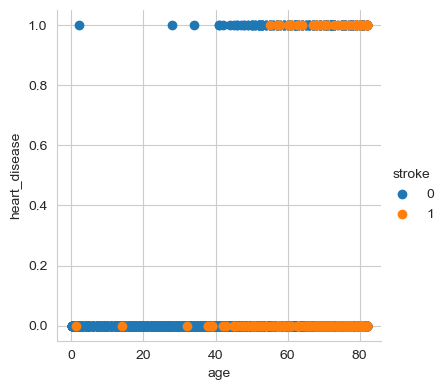

In [136]:
#there is know relation between age and hyperstension
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'stroke', height = 4).map(plt.scatter, 'age', 'heart_disease').add_legend()
plt.show()

In [137]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [138]:
m1 = df['gender'][(df['gender'] == 'Male') & (df['heart_disease'] == 1)].shape[0]

In [139]:
m1

163

In [140]:
f1 = df['gender'][(df['gender'] == 'Female') & (df['heart_disease'] == 1)].shape[0]

In [141]:
f1

113

In [142]:
df['heart_disease'].shape[0]

5110

In [143]:
male = (m1 / 5110) * 100

In [144]:
male

3.189823874755381

In [145]:
female = (f1 / 5110) * 100

In [146]:
female

2.2113502935420746

In [147]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [148]:
male1 = df['avg_glucose_level'][df['gender'] == 'Male'].sort_values().median()

In [149]:
female1 = df['avg_glucose_level'][df['gender'] == 'Female'].sort_values().median()

In [150]:
male1

93.55

In [151]:
female1

90.755

In [152]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [153]:
df['Residence_type'][(df['stroke'] == 1) & (df['Residence_type'] == 'Urban')].shape[0]

135

In [154]:
(135 / 5110) * 100

2.6418786692759295

In [155]:
df['Residence_type'][(df['stroke'] == 1) & (df['Residence_type'] == 'Rural')].shape[0]

114

In [156]:
(114 / 5110) * 100

2.2309197651663406

In [157]:
df['stroke'].corr(df['bmi'])

np.float64(0.038946596512020044)

In [158]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [159]:
df['stroke'][df['smoking_status'] == 'smokes'].shape[0]

789

In [160]:
#multivariate

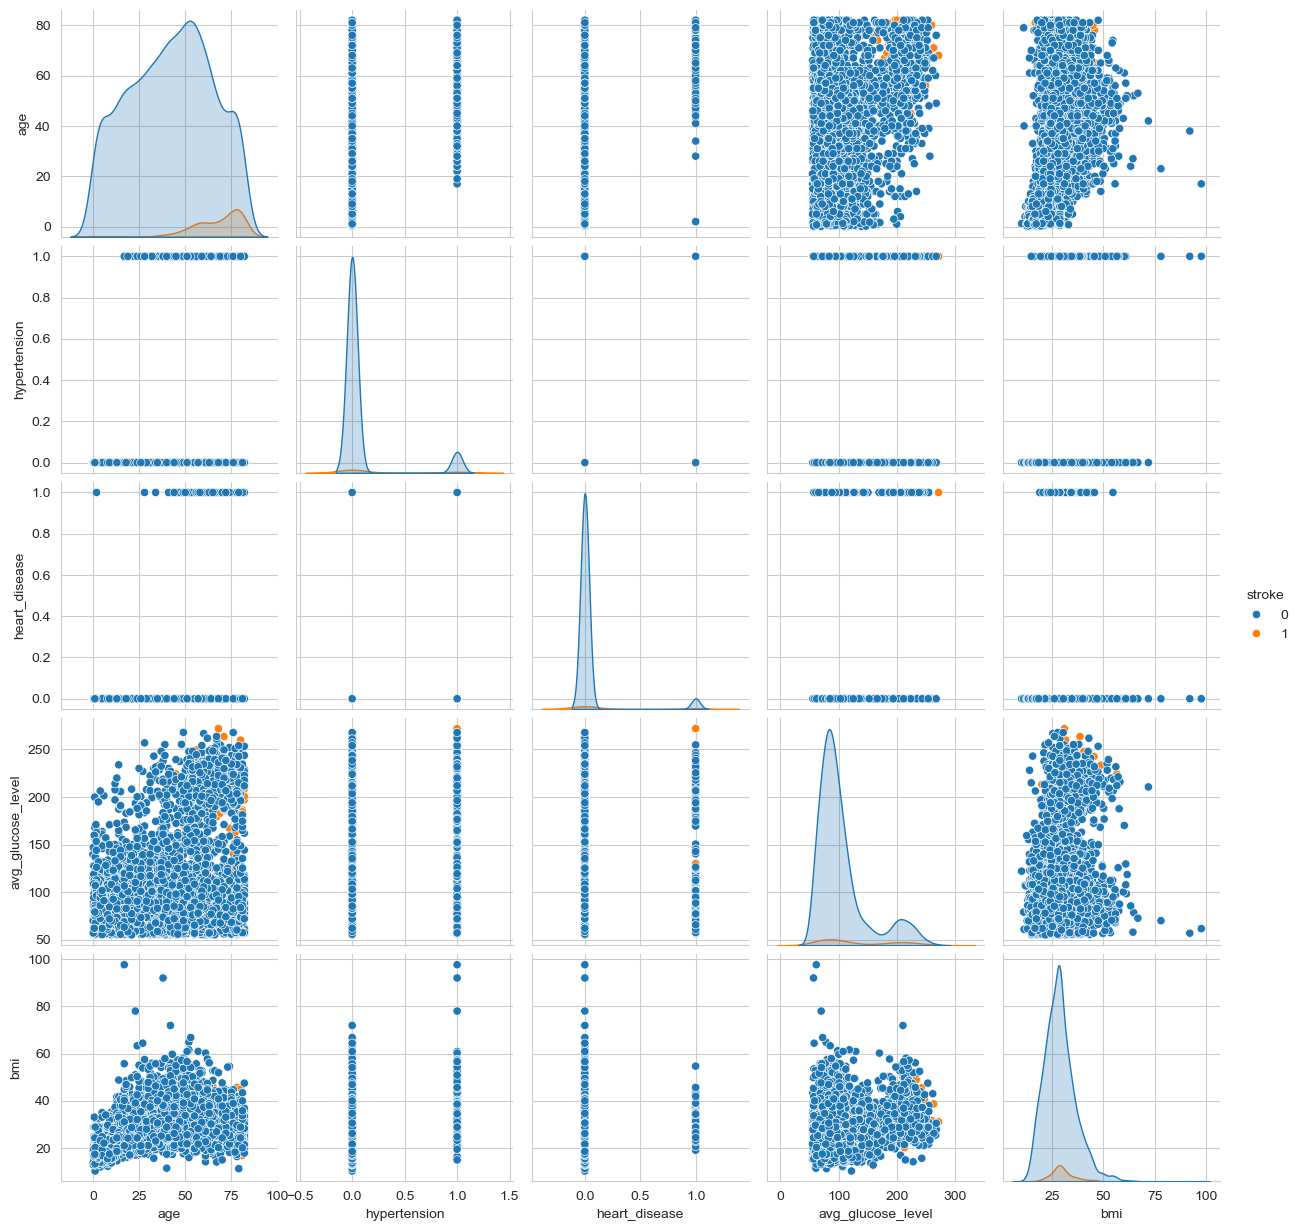

In [161]:
sns.pairplot(df, hue = 'stroke')
plt.show()

In [162]:
sns.heatmap(df.corr(method = 'spearmanr'), annot = True)

ValueError: could not convert string to float: 'Male'

In [163]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [165]:
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 2)
df['ever_married'] = df['ever_married'].apply(lambda x : 1 if x == 'Yes' else 0)

In [166]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [167]:
def cat(x):
    if x == 'Govt_job':
        return 1
    elif x == 'Private':
        return 2
    elif x == 'Self-employed':
        return 3
    elif x == 'Never_worked':
        return 4
    else:
        return 5

In [168]:
df['work_type'] = df['work_type'].apply(cat)

In [169]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [170]:
df['Residence_type'] = df['Residence_type'].apply(lambda x : 1 if x == 'Urban' else 2)

In [171]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [172]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [173]:
def cat2(x):
    if x == 'never smoked':
        return 1 
    elif x == 'Unknown':
        return 2
    elif x == 'formerly smoked':
        return 3
    else:
        return 4

In [174]:
df['smoking_status'] = df['smoking_status'].apply(cat2)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


<Axes: >

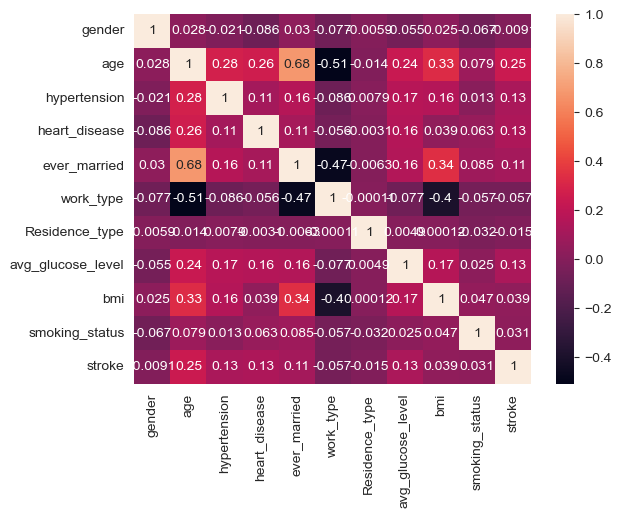

In [176]:
sns.heatmap(df.corr(), annot = True)

In [177]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,3,1
1,2,61.0,0,0,1,3,2,202.21,28.893237,1,1
2,1,80.0,0,1,1,2,2,105.92,32.500000,1,1
3,2,49.0,0,0,1,2,1,171.23,34.400000,4,1
4,2,79.0,1,0,1,3,2,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,2,1,83.75,28.893237,1,0
5106,2,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,2,35.0,0,0,1,3,2,82.99,30.600000,1,0
5108,1,51.0,0,0,1,2,2,166.29,25.600000,3,0


In [178]:
df1 = pd.read_csv('stroke-data.csv')

In [179]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [186]:
# the people who have a heart diseases
df1['age'][df1['heart_disease'] == 1].value_counts()

age
78.0    20
79.0    19
80.0    17
82.0    14
71.0    14
81.0    13
72.0    13
69.0    11
73.0     9
75.0     8
61.0     8
64.0     8
76.0     8
63.0     8
57.0     7
52.0     7
68.0     7
67.0     6
70.0     6
55.0     6
62.0     6
53.0     6
77.0     5
66.0     5
59.0     4
58.0     4
50.0     4
60.0     4
51.0     3
65.0     3
54.0     3
56.0     3
74.0     2
49.0     2
48.0     2
46.0     2
41.0     2
34.0     1
42.0     1
45.0     1
2.0      1
28.0     1
47.0     1
44.0     1
Name: count, dtype: int64

In [187]:
# the people who have a heart diseases
df1['gender'][df1['heart_disease'] == 1].value_counts()

gender
Male      163
Female    113
Name: count, dtype: int64

In [189]:
df1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [192]:
df1['stroke'][df1['smoking_status'] == 'smokes'].value_counts()

stroke
0    747
1     42
Name: count, dtype: int64